In [5]:
import cv2

In [21]:
from img2table.document import Image
from PIL import Image as PILImage

img = Image(src="Image4.jpg")

# Extract tables
extracted_tables = img.extract_tables()
print(extracted_tables)
type(extracted_tables[1])

[ExtractedTable(title=None, bbox=(97, 578, 934, 904),shape=(5, 13)), ExtractedTable(title=None, bbox=(98, 111, 930, 433),shape=(5, 13)), ExtractedTable(title=None, bbox=(98, 1055, 936, 1382),shape=(5, 13))]


img2table.tables.objects.extraction.ExtractedTable

OrderedDict([(0, [TableCell(bbox=BBox(x1=97, y1=578, x2=161, y2=643), value=None), TableCell(bbox=BBox(x1=161, y1=578, x2=225, y2=643), value=None), TableCell(bbox=BBox(x1=225, y1=578, x2=289, y2=643), value=None), TableCell(bbox=BBox(x1=289, y1=578, x2=353, y2=643), value=None), TableCell(bbox=BBox(x1=353, y1=578, x2=418, y2=643), value=None), TableCell(bbox=BBox(x1=418, y1=578, x2=483, y2=643), value=None), TableCell(bbox=BBox(x1=483, y1=578, x2=547, y2=643), value=None), TableCell(bbox=BBox(x1=547, y1=578, x2=612, y2=643), value=None), TableCell(bbox=BBox(x1=612, y1=578, x2=676, y2=643), value=None), TableCell(bbox=BBox(x1=676, y1=578, x2=740, y2=643), value=None), TableCell(bbox=BBox(x1=740, y1=578, x2=805, y2=643), value=None), TableCell(bbox=BBox(x1=805, y1=578, x2=870, y2=643), value=None), TableCell(bbox=BBox(x1=870, y1=578, x2=934, y2=643), value=None)]), (1, [TableCell(bbox=BBox(x1=97, y1=643, x2=161, y2=708), value=None), TableCell(bbox=BBox(x1=161, y1=643, x2=225, y2=708), 

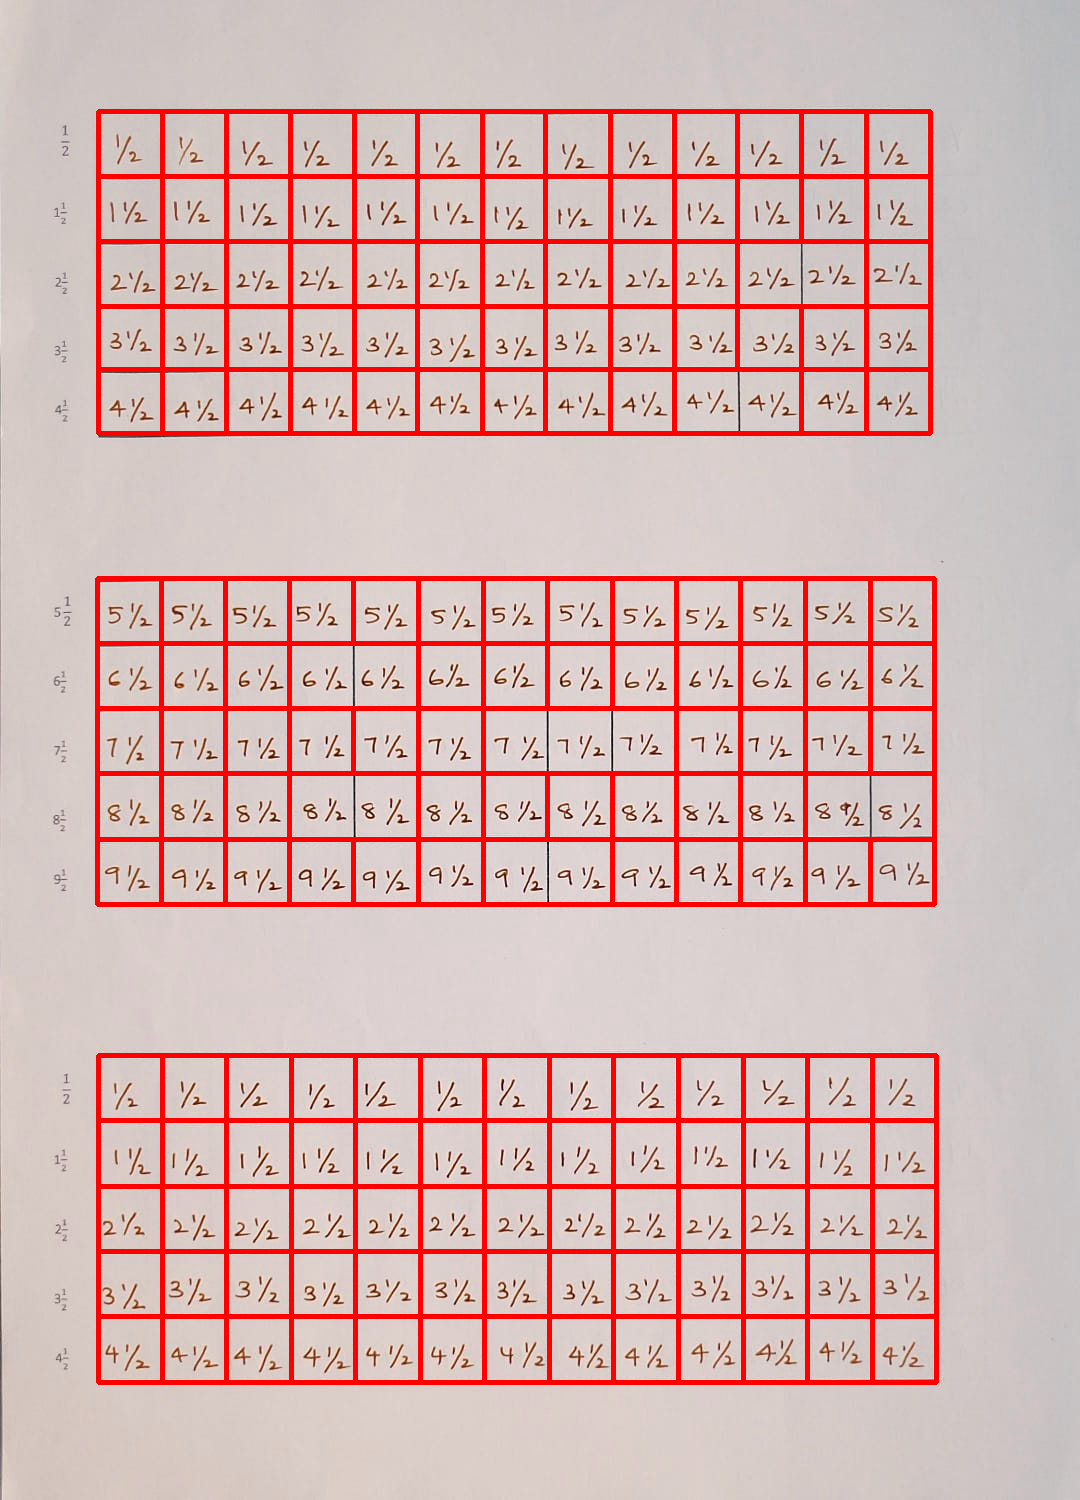

In [22]:
table_img = cv2.imread("Image4.jpg")
i = 585
cp_table = table_img.copy()

for table in extracted_tables:
    print(table.content)
    for row in table.content.values():
        for cell in row:
            print(cell)
            cv2.rectangle(cp_table, (cell.bbox.x1, cell.bbox.y1), (cell.bbox.x2, cell.bbox.y2),(255, 0, 0), 3)
            sp_cell = table_img[cell.bbox.y1:cell.bbox.y2, cell.bbox.x1:cell.bbox.x2]
            #cv2.imwrite(f'./Cell_cropped/Cell_{i}.jpg', sp_cell)
            i = i + 1
            
PILImage.fromarray(cp_table)